In [1]:
from plotnine import ggplot, aes, geom_point, geom_line, scale_x_continuous, labs, scale_color_manual, scale_y_continuous, geom_boxplot, facet_wrap
import pandas as pd
import json

/mnt/c/Users/wessc/prep_venv/lib/python3.10/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 1 values. 2 were requested from it.
/mnt/c/Users/wessc/prep_venv/lib/python3.10/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 1 values. 2 were requested from it.


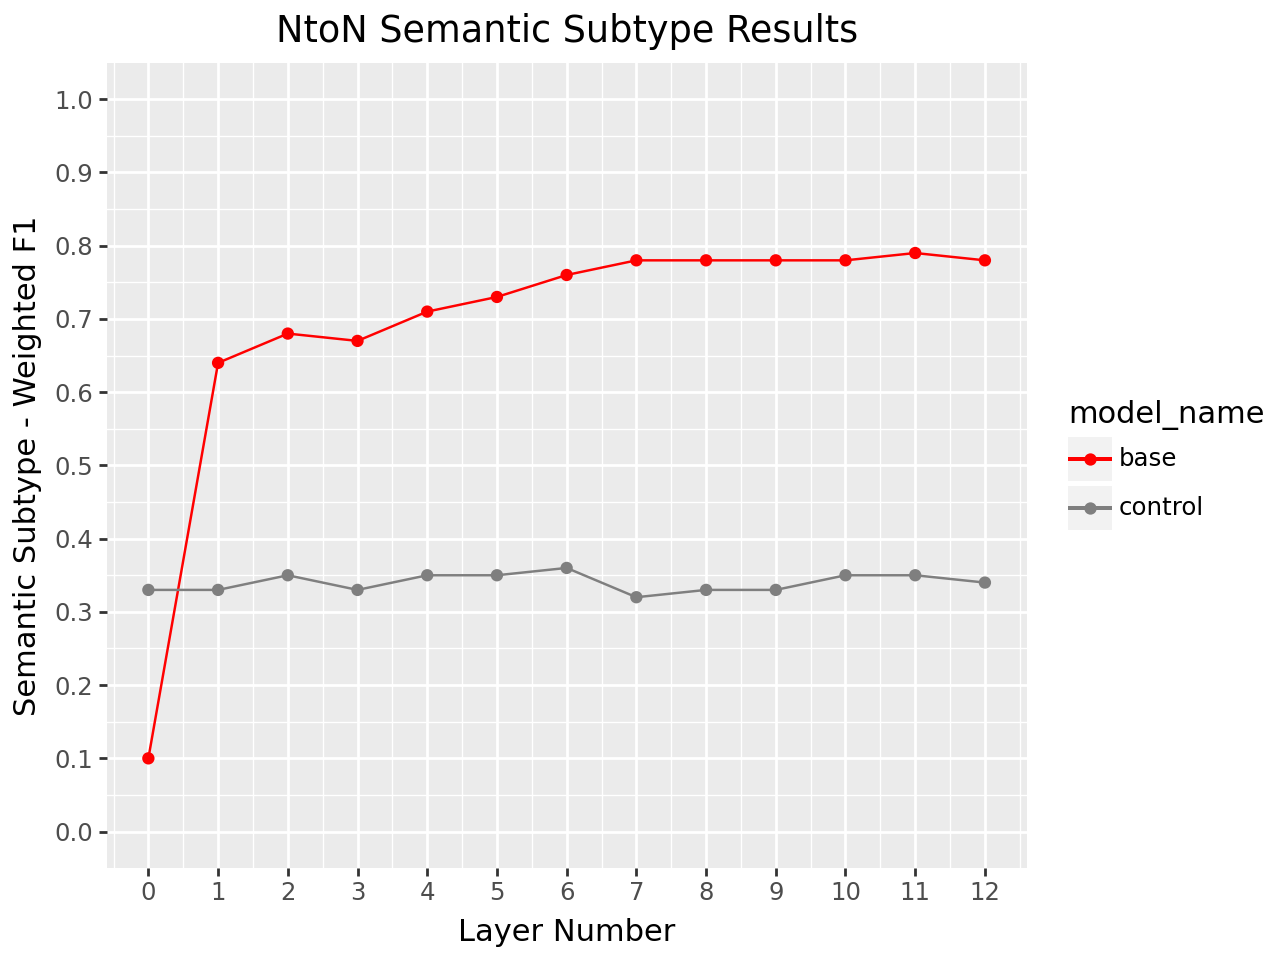

In [2]:
#semantic visualizatoin
sem_df = pd.read_csv("./outputs/NPNresults_semantic.csv")

p = ggplot(aes(x='layer_num', y='f1'), sem_df)
p + geom_point(aes(color='model_name')) + geom_line(aes(color='model_name')) + \
scale_x_continuous(breaks=sem_df['layer_num'].unique()) + scale_color_manual(values={'base': 'red'}) + \
labs(x='Layer Number', y='Semantic Subtype - Weighted F1', title='NtoN Semantic Subtype Results') + \
scale_y_continuous(breaks=[i / 10.0 for i in range(11)], limits=(0, 1))

/mnt/c/Users/wessc/prep_venv/lib/python3.10/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 1 values. 2 were requested from it.
/mnt/c/Users/wessc/prep_venv/lib/python3.10/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 1 values. 2 were requested from it.


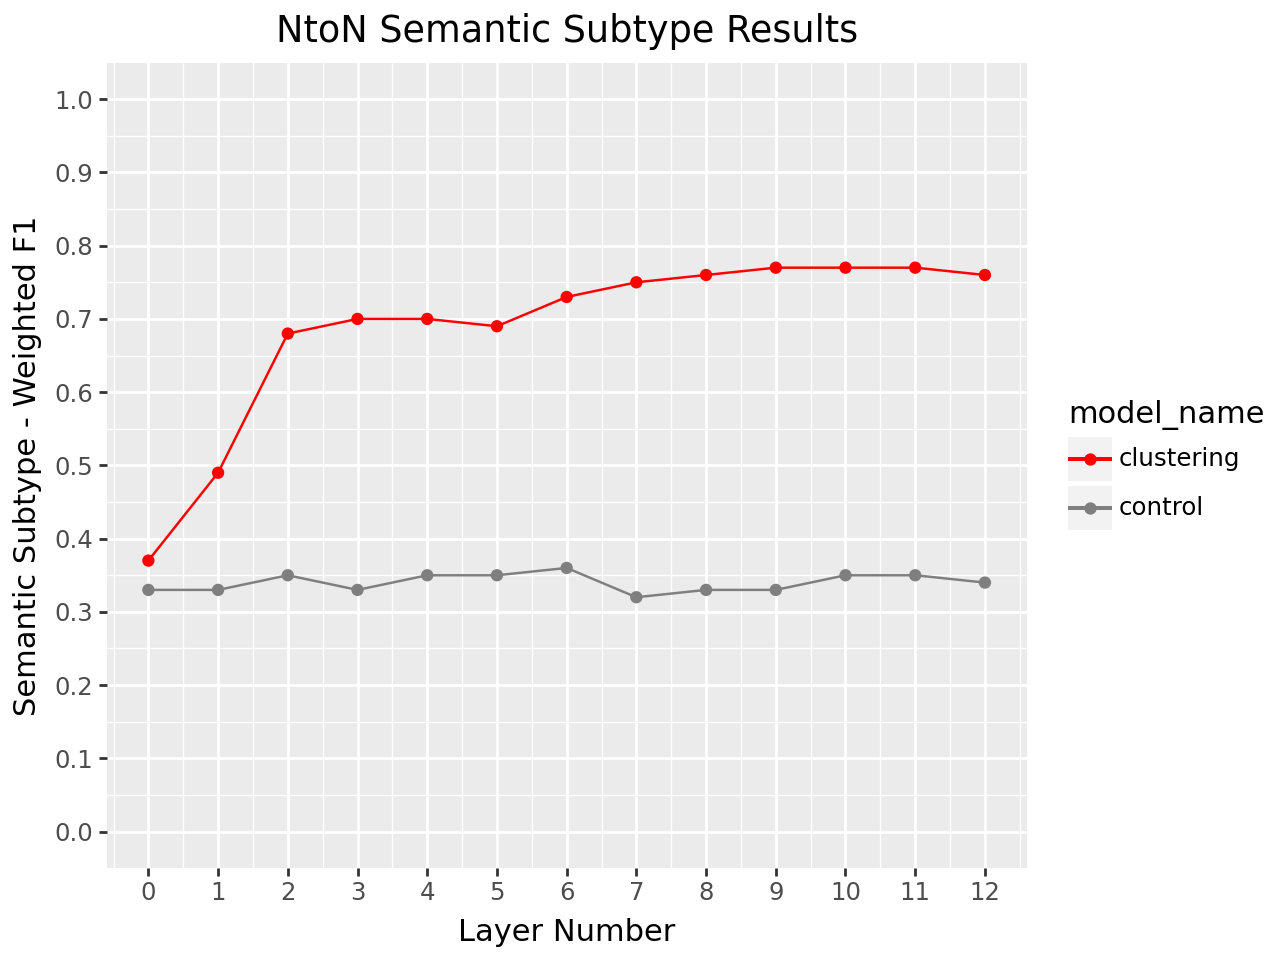

In [3]:
#clustering visualization
sem_df = pd.read_csv("./outputs/NPN results_clustering.csv")

p = ggplot(aes(x='layer_num', y='f1'), sem_df)
p + geom_point(aes(color='model_name')) + geom_line(aes(color='model_name')) + \
scale_x_continuous(breaks=sem_df['layer_num'].unique()) + scale_color_manual(values={'clustering': 'red'}) + \
labs(x='Layer Number', y='Semantic Subtype - Weighted F1', title='NtoN Semantic Subtype Results') + \
scale_y_continuous(breaks=[i / 10.0 for i in range(11)], limits=(0, 1))

In [4]:

#just read similarities from highest performing clustering layer, layer11
sims_df = pd.read_json("./outputs/clustering_sims_layer11_lt_LR.json")

In [5]:
#convert similarity data into lists
correct_1s = list(sims_df.loc["C", 1])
incorrect_1s = list(sims_df.loc["I", 1])

correct_0s = list(sims_df.loc["C", 0])
incorrect_0s = list(sims_df.loc["I", 0])

correct_2s = list(sims_df.loc["C", 2])
incorrect_2s = list(sims_df.loc["I", 2])

In [6]:
#convert data into dataframe
sims_df_vis = pd.DataFrame(columns=["Sim", "Subtype", "Correctness"])

for num in correct_1s:
  sims_df_vis.loc[len(sims_df_vis.index)] = [num, "Succession", "Correct"]

for num in incorrect_1s:
  sims_df_vis.loc[len(sims_df_vis.index)] = [num, "Succession", "Incorrect"]

for num in correct_0s:
  sims_df_vis.loc[len(sims_df_vis.index)] = [num, "False Positive", "Correct"]

for num in incorrect_0s:
  sims_df_vis.loc[len(sims_df_vis.index)] = [num, "False Positive", "Incorrect"]

for num in correct_2s:
  sims_df_vis.loc[len(sims_df_vis.index)] = [num, "Juxtaposition", "Correct"]

for num in incorrect_2s:
  sims_df_vis.loc[len(sims_df_vis.index)] = [num, "Juxtaposition", "Incorrect"]



/tmp/ipykernel_86/4101203558.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


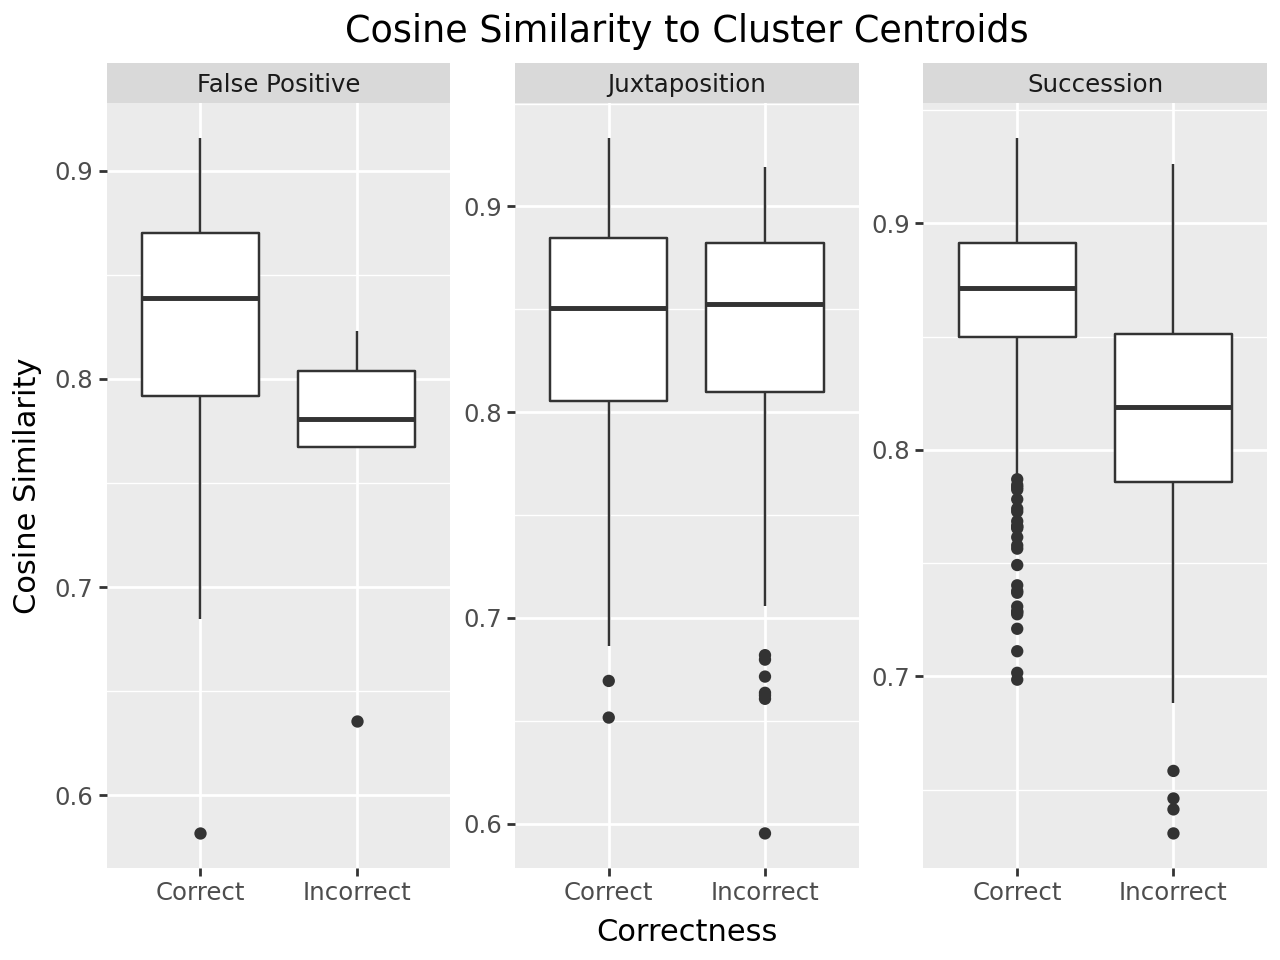

In [8]:
#boxplot using facet wrap for the different subtypes
plot = (
    ggplot(sims_df_vis, aes(x='Correctness', y='Sim')) +
    geom_boxplot() +
    facet_wrap('~ Subtype', scales='free') +  # Using facet_wrap to create separate plots for each set
    labs(title='Cosine Similarity to Cluster Centroids', x='Correctness', y='Cosine Similarity')
)

print(plot)

In [ ]:
from glob import glob

In [ ]:
#Base Visualization generation - NOT USED FOR SEMANTIC EXPERIMENTS
#This is only for if you want to generate the visualizations from my QP1
#Nothing for ML Final Beyond this point

results_base_files = glob("./outputs/predictions*lt*LR.tsv")


In [ ]:
from collections import defaultdict

In [ ]:
judgements = defaultdict(dict) #stores the accuracy value by layer ["positive"]["negative"]
for layer in range(0, 13):
  judgements[layer]["Y"] = defaultdict(list)
  judgements[layer]["N"] = defaultdict(list)

  in_file = f"./outputs/predictions_layer_{layer}_base_lt_LR_subtype.tsv"
  base_df = pd.read_csv(in_file, delimiter="\t")
  base_df = base_df.loc[:1749, ]
  #print(base_df.columns)
  for r in base_df.index:
    orig_label = base_df.loc[r, "Orig Label"]
    pred = base_df.loc[r, "Pred"]
    gold = base_df.loc[r, "True NPN"]
    gold = 1 if gold == "Y" else 0
    judgements[layer][orig_label]["golds"].append(gold)
    judgements[layer][orig_label]["preds"].append(pred)


Index(['Orig Label', 'Perturbation', 'Subtype', 'Orig Label.1',
       'Perturbation.1', 'True NPN', 'N1', 'Sentence Raw Text', 'Pred',
       'Control Pred', 'Control Gold'],
      dtype='object')
Index(['Orig Label', 'Perturbation', 'Subtype', 'Orig Label.1',
       'Perturbation.1', 'True NPN', 'N1', 'Sentence Raw Text', 'Pred',
       'Control Pred', 'Control Gold'],
      dtype='object')
Index(['Orig Label', 'Perturbation', 'Subtype', 'Orig Label.1',
       'Perturbation.1', 'True NPN', 'N1', 'Sentence Raw Text', 'Pred',
       'Control Pred', 'Control Gold'],
      dtype='object')
Index(['Orig Label', 'Perturbation', 'Subtype', 'Orig Label.1',
       'Perturbation.1', 'True NPN', 'N1', 'Sentence Raw Text', 'Pred',
       'Control Pred', 'Control Gold'],
      dtype='object')
Index(['Orig Label', 'Perturbation', 'Subtype', 'Orig Label.1',
       'Perturbation.1', 'True NPN', 'N1', 'Sentence Raw Text', 'Pred',
       'Control Pred', 'Control Gold'],
      dtype='object')
Index(['Or

In [ ]:
accuracy = defaultdict(list)

In [ ]:
accuracy = defaultdict(list)
for layer in range(0, 13):
  for l in ["Y", "N"]:
    correct = 0
    total = 0
    gold_y = judgements[layer][l]["golds"]
    pred_y = judgements[layer][l]["preds"]
    assert len(gold_y) == len(pred_y)
    print(len(gold_y))
    print(len(pred_y))
    for g, p in zip(gold_y, pred_y):
      if g == p:
        correct += 1
      total += 1
    print(correct, total)
    acc = correct / total
    print(acc)
    if l == "N":
      acc = 1 - acc
    accuracy[l].append(acc)

In [ ]:
accuracy

In [ ]:
cont_judgements = defaultdict(dict) #stores the accuracy value by layer ["positive"]["negative"]
for layer in range(0, 13):
  cont_judgements[layer]["Y"] = defaultdict(list)
  cont_judgements[layer]["N"] = defaultdict(list)

  in_file = f"./outputs/predictions_layer_{layer}_base_lt_LR.tsv"
  base_df = pd.read_csv(in_file, delimiter="\t")
  base_df = base_df.loc[:1749, ]
  print(base_df.columns)
  for r in base_df.index:
    orig_label = base_df.loc[r, "Control Gold"]
    orig_label = "Y" if orig_label == 1 else "N"
    pred = base_df.loc[r, "Control Pred"]
    gold = base_df.loc[r, "Control Gold"]
    # gold = 1 if gold == "Y" else 0
    cont_judgements[layer][orig_label]["golds"].append(gold)
    cont_judgements[layer][orig_label]["preds"].append(pred)

In [ ]:
cont_accuracy = defaultdict(list)
for layer in range(0, 13):
  for l in ["Y", "N"]:
    correct = 0
    total = 0
    gold_y = cont_judgements[layer][l]["golds"]
    pred_y = cont_judgements[layer][l]["preds"]
    assert len(gold_y) == len(pred_y)
    print(len(gold_y))
    print(len(pred_y))
    for g, p in zip(gold_y, pred_y):
      if g == p:
        correct += 1
      total += 1
    print(correct, total)
    acc = correct / total
    print(acc)
    if l == "N":
      acc = 1 - acc
    cont_accuracy[l].append(acc)

In [ ]:
cont_accuracy

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_line, scale_x_continuous, scale_color_manual, labs, scale_y_continuous, geom_hline

In [ ]:
y_df = pd.DataFrame({'index': range(len(accuracy["Y"])), 'values': accuracy["Y"]})
y_cont_df = pd.DataFrame({'index': range(len(cont_accuracy["Y"])), 'values': cont_accuracy["Y"]})

y_df['dataset'] = 'gold'
y_cont_df['dataset'] = 'control'
combined_df = pd.concat([y_df, y_cont_df], ignore_index=True)

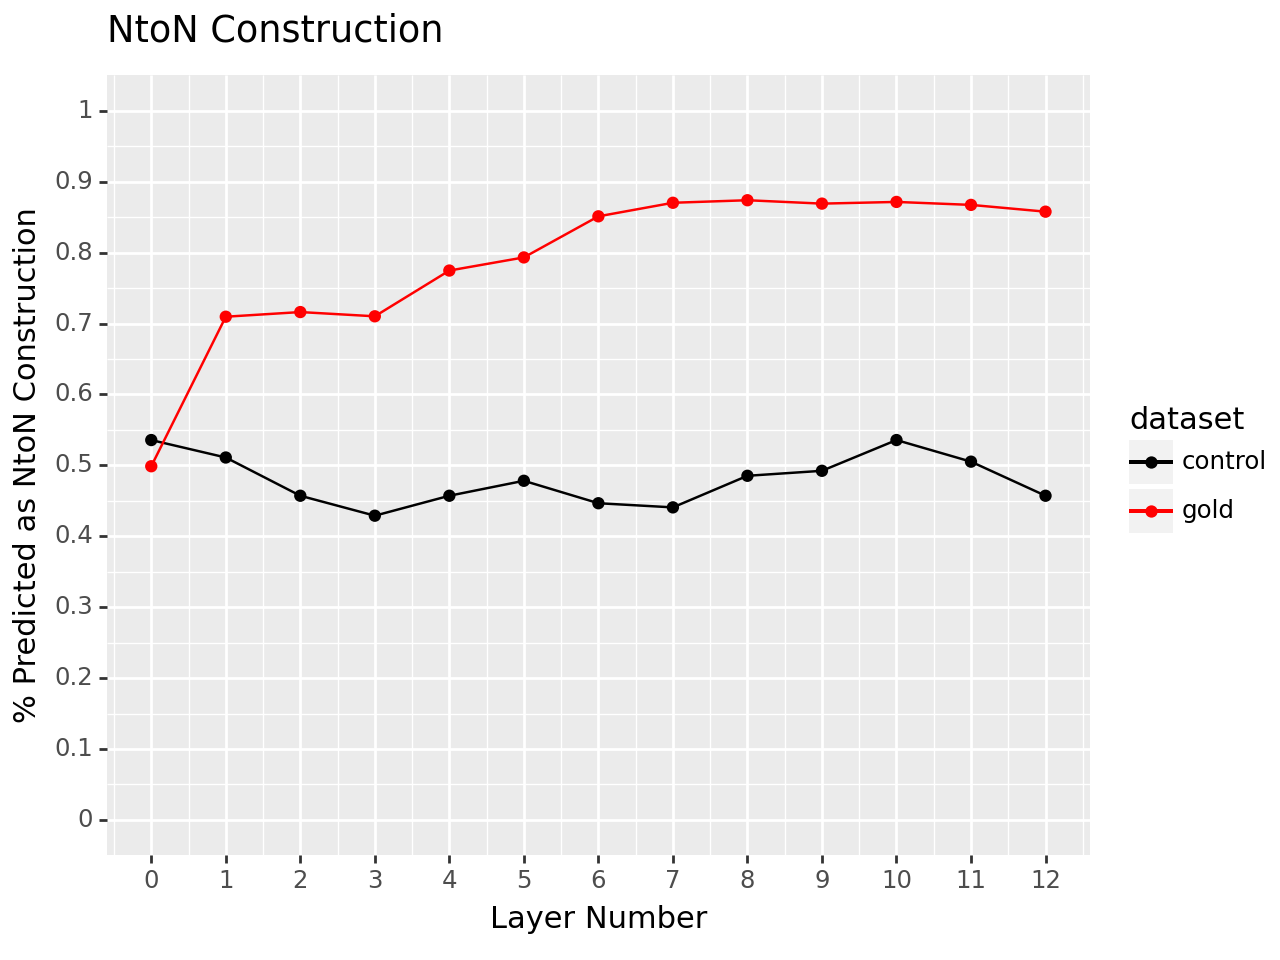

<Figure Size: (640 x 480)>

In [ ]:
 p = ggplot(aes(x='index', y='values', color='dataset'), combined_df) + \
    geom_point() + \
    scale_x_continuous(breaks=combined_df['index'].unique()) + \
    geom_line() + \
    labs(x='Layer Number', y='% Predicted as NtoN Construction', title='NtoN Construction') + \
    scale_color_manual(values=["black", "red"]) + scale_y_continuous(limits=[0, 1], breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
p

In [ ]:
n_df = pd.DataFrame({'index': range(len(accuracy["N"])), 'values': accuracy["N"]})
n_cont_df = pd.DataFrame({'index': range(len(cont_accuracy["N"])), 'values': cont_accuracy["N"]})

n_df['dataset'] = 'gold'
n_cont_df['dataset'] = 'control'
combined_df_n = pd.concat([n_df, n_cont_df], ignore_index=True)

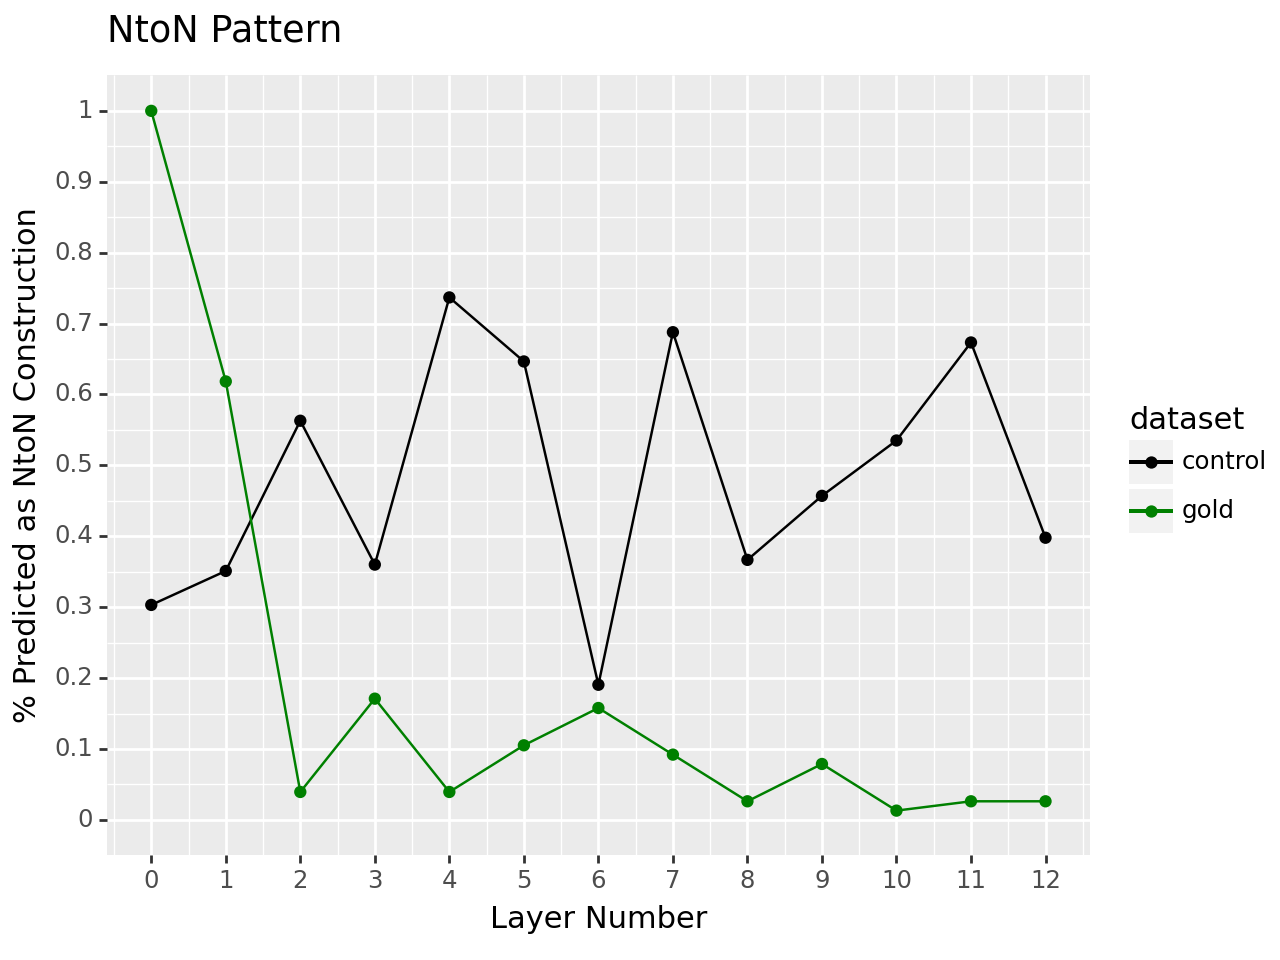

<Figure Size: (640 x 480)>

In [ ]:
  p = ggplot(aes(x='index', y='values', color='dataset'), combined_df_n) + \
    geom_point() + \
    scale_x_continuous(breaks=combined_df['index'].unique()) + \
    geom_line() + \
    labs(x='Layer Number', y='% Predicted as NtoN Construction', title='NtoN Pattern') + \
    scale_color_manual(values=["black", "green"]) + scale_y_continuous(limits=[0, 1], breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
p

In [ ]:
selectivity_y = []
for layer in range(len(accuracy["Y"])):
  acc = accuracy["Y"][layer]
  c_acc = cont_accuracy["Y"][layer]
  s = acc - c_acc
  selectivity_y.append(s)

In [ ]:
selectivity_y

[0.6705744431418523,
 0.47661566948334716,
 -0.0895567124814941,
 0.45674553652090244,
 -0.0034966895950899746,
 0.20462672330841603,
 0.7490976397870472,
 0.255717048970462,
 0.34953940061151806,
 0.39285689274344116,
 0.3022286931639123,
 0.03269646381244917,
 0.3668561728161623]

In [ ]:
selectivity_y
s_y_df = pd.DataFrame({'index': range(len(selectivity_y)), 'values': selectivity_y})

In [ ]:
p = ggplot(aes(x='index', y='values'), s_y_df) + \
  geom_point(color="orange") + \
  scale_x_continuous(breaks=s_y_df['index'].unique()) + \
  geom_line(color="orange") + \
  labs(x='Layer Number', y='Selectivity (Gold Acc - Control Acc)', title='Selectivity (NtoN Construction)') + \
  scale_color_manual(values="orange") + scale_y_continuous(limits=[-1, 1], breaks=[-1, -.9, -.8, -.7, -.6, -0.5, -.4, -.3, -.2, -.1, 0, .1, 0.2, 0.3, 0.4, .5, .6, .7, .8, .9, 1]) + geom_hline(yintercept=0)
p

In [ ]:
judgements = defaultdict(lambda: defaultdict(dict)) #stores the accuracy value by layer ["positive"]["negative"]
for layer in range(0, 13):
  for pert in [1, 2, 3, 4]:
    judgements[layer][pert]["Y"] = defaultdict(list)
    judgements[layer][pert]["N"] = defaultdict(list)
    in_file = f"./outputs/perturbed/pert_predictions_layer_{layer}_pert_{pert}_lt_MLP2.tsv"
    base_df = pd.read_csv(in_file, delimiter="\t")
    # print(base_df.columns)
    for r in base_df.index:
      orig_label = base_df.loc[r, "Orig Label"]
      pred = base_df.loc[r, "Pred"]
      gold = base_df.loc[r, "True NPN"]
      gold = 1 if gold == "Y" else 0
      judgements[layer][pert][orig_label]["golds"].append(gold)
      judgements[layer][pert][orig_label]["preds"].append(pred)

cont_judgements = defaultdict(lambda: defaultdict(dict)) #stores the accuracy value by layer ["positive"]["negative"]
for layer in range(0, 13):
  for pert in [1, 2, 3, 4]:
    cont_judgements[layer][pert]["Y"] = defaultdict(list)
    cont_judgements[layer][pert]["N"] = defaultdict(list)
    in_file = f"./outputs/perturbed/pert_predictions_layer_{layer}_pert_{pert}_lt_MLP2.tsv"
    base_df = pd.read_csv(in_file, delimiter="\t")
    # print(base_df.columns)
    for r in base_df.index:
      orig_label = base_df.loc[r, "Control Gold"]
      orig_label = "Y" if orig_label == 1 else "N"
      pred = base_df.loc[r, "Control Pred"]
      gold = base_df.loc[r, "Control Gold"]
      #gold = 1 if gold == "Y" else 0
      cont_judgements[layer][pert][orig_label]["golds"].append(gold)
      cont_judgements[layer][pert][orig_label]["preds"].append(pred)



# print(judgements.keys())
accuracy = defaultdict(lambda: defaultdict(list))
cont_accuracy = defaultdict(lambda: defaultdict(list))
for layer in range(0, 13):
  for pert in [1, 2, 3, 4]:
    for l in ["Y", "N"]:
      correct = 0
      total = 0
      # print(judgements[layer][pert])
      gold_y = judgements[layer][pert][l]["golds"]
      pred_y = judgements[layer][pert][l]["preds"]
      assert len(gold_y) == len(pred_y)
      # print(len(gold_y))
      # print(len(pred_y))
      for g, p in zip(gold_y, pred_y):
        if g == p:
          correct += 1
        total += 1
      # print(correct, total)
      acc = 1 - (correct / total)
      # print(acc)
      # if l == "N":
      #   acc = 1 - acc
      accuracy[pert][l].append(acc)

for layer in range(0, 13):
  for pert in [1, 2, 3, 4]:
    for l in ["Y", "N"]:
      correct = 0
      total = 0
      # print(judgements[layer][pert])
      gold_y = cont_judgements[layer][pert][l]["golds"]
      pred_y = cont_judgements[layer][pert][l]["preds"]
      assert len(gold_y) == len(pred_y)
      # print(len(gold_y))
      # print(len(pred_y))
      for g, p in zip(gold_y, pred_y):
        if g == p:
          correct += 1
        total += 1
      # print(correct, total)
      acc = 1 - (correct / total)
      # print(acc)
      # if l == "N":
      #   acc = 1 - acc
      cont_accuracy[pert][l].append(acc)

In [ ]:
accuracy

In [ ]:
#change the "Y" to "N" to get other perturbation performance

pert_1_df = pd.DataFrame({'index': range(len(accuracy[1]["Y"])), 'values': accuracy[1]["Y"]})
pert_2_df = pd.DataFrame({'index': range(len(accuracy[2]["Y"])), 'values': accuracy[2]["Y"]})
pert_3_df = pd.DataFrame({'index': range(len(accuracy[3]["Y"])), 'values': accuracy[3]["Y"]})
pert_4_df = pd.DataFrame({'index': range(len(accuracy[4]["Y"])), 'values': accuracy[4]["Y"]})

pert_1_df_c = pd.DataFrame({'index': range(len(cont_accuracy[1]["Y"])), 'values': cont_accuracy[1]["Y"]})
pert_2_df_c = pd.DataFrame({'index': range(len(cont_accuracy[2]["Y"])), 'values': cont_accuracy[2]["Y"]})
pert_3_df_c = pd.DataFrame({'index': range(len(cont_accuracy[3]["Y"])), 'values': cont_accuracy[3]["Y"]})
pert_4_df_c = pd.DataFrame({'index': range(len(cont_accuracy[4]["Y"])), 'values': cont_accuracy[4]["Y"]})

data = pd.concat([pert_1_df.assign(df='NNP'), pert_2_df.assign(df='PNN'), pert_3_df.assign(df='NP'), pert_4_df.assign(df='PN')])

data_c = pd.concat([pert_1_df_c.assign(df='NNP'), pert_2_df_c.assign(df='PNN'), pert_3_df_c.assign(df='NP'), pert_4_df_c.assign(df='PN')])

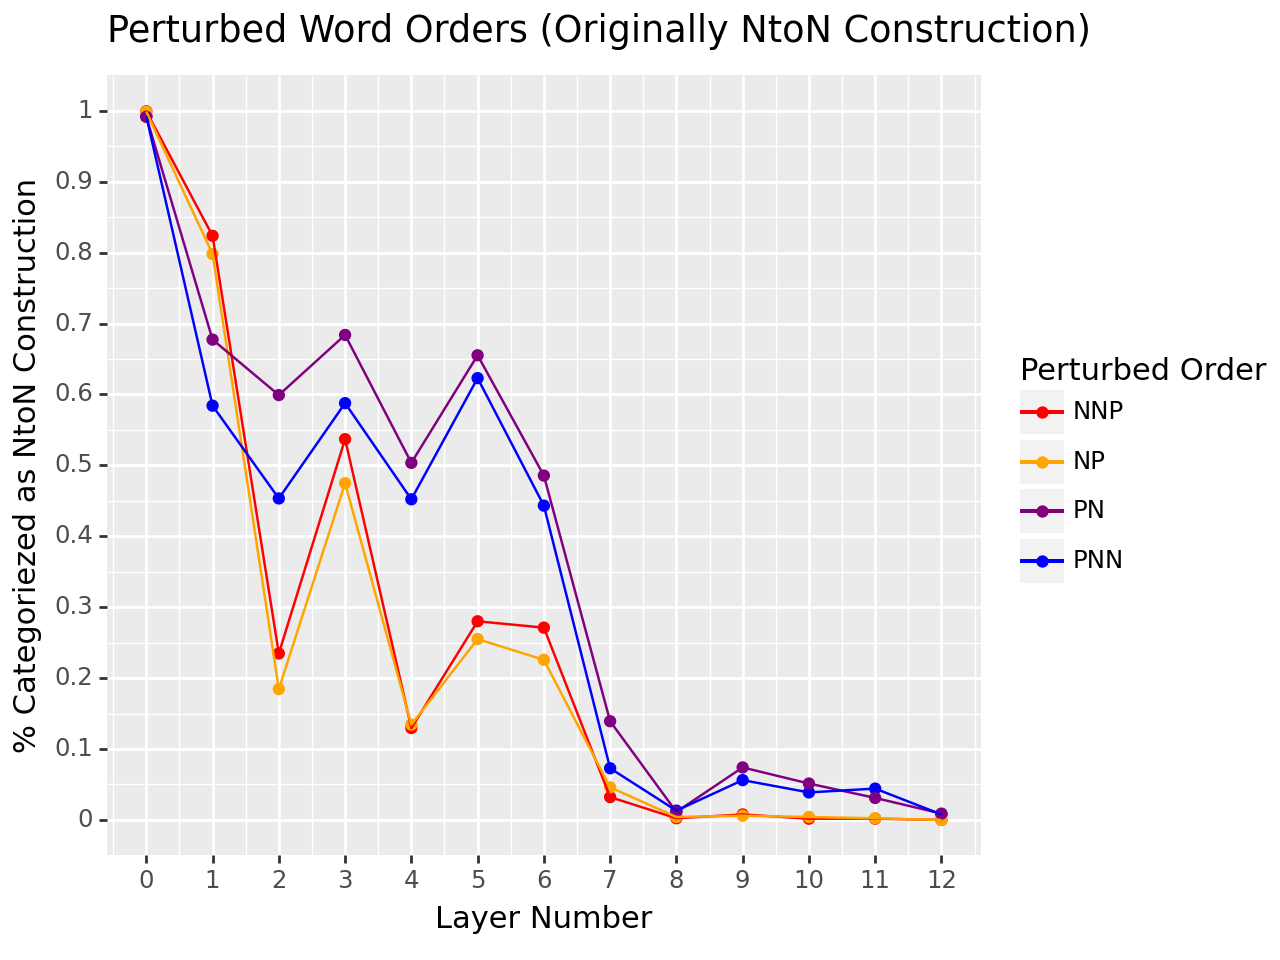

<Figure Size: (640 x 480)>

In [ ]:
p = ggplot() + \
    geom_point(aes(x='index', y='values', color='df'), data=data) + \
    geom_line(aes(x='index', y='values', color='df'), data=data) + \
    scale_x_continuous(breaks=pert_1_df["index"].unique()) + \
    scale_color_manual(values={'NNP': "red", 'PNN': "blue", "NP": "orange", "PN": "purple"}) + \
    labs(x='Layer Number', y='% Categoriezed as NtoN Construction', title='Perturbed Word Orders (Originally NtoN Construction)', color="Perturbed Order") + scale_y_continuous(limits=[0, 1], breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

p

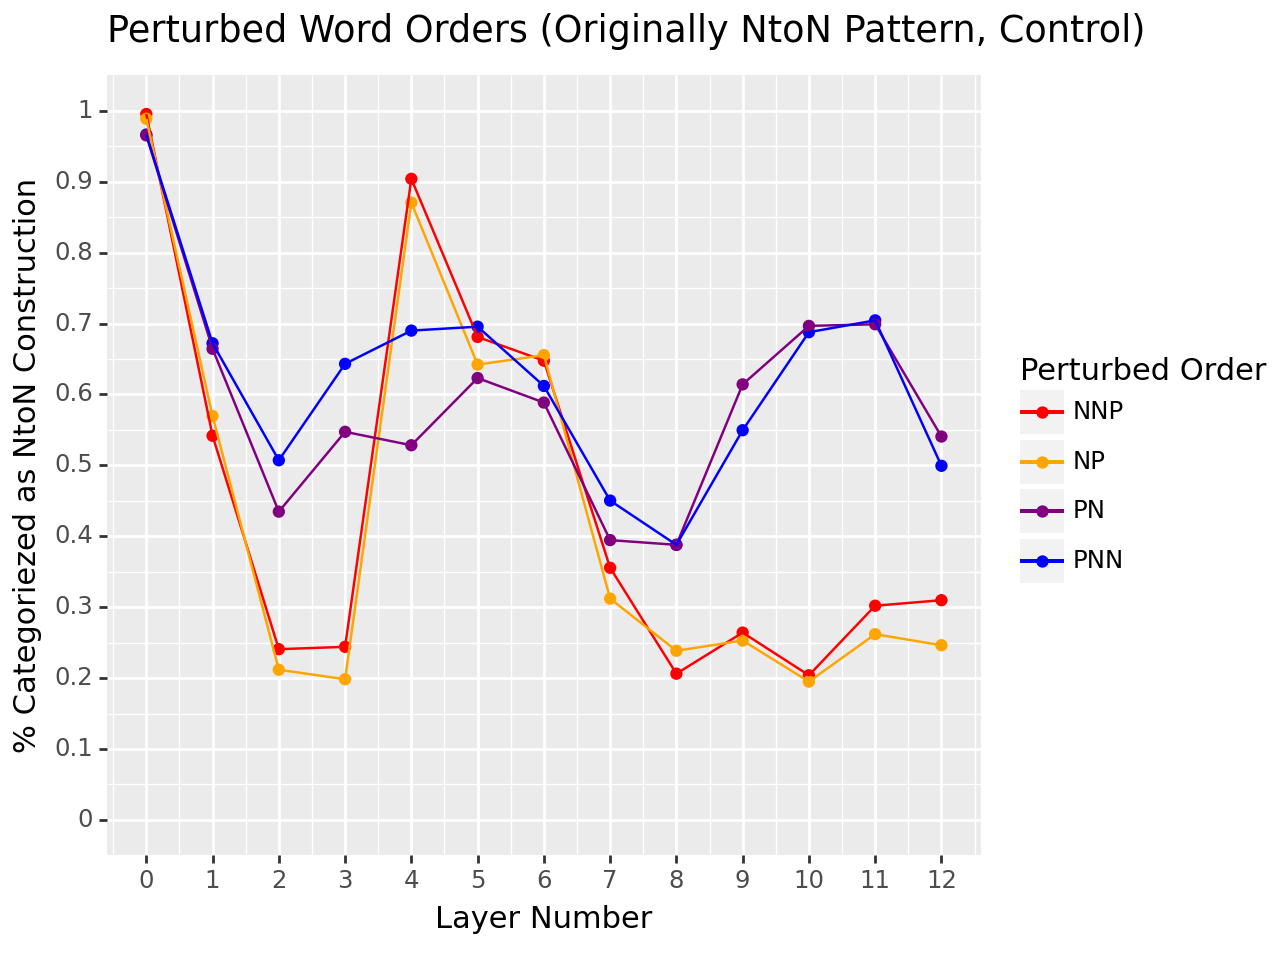

<Figure Size: (640 x 480)>

In [ ]:
p = ggplot() + \
    geom_point(aes(x='index', y='values', color='df'), data=data_c) + \
    geom_line(aes(x='index', y='values', color='df'), data=data_c) + \
    scale_x_continuous(breaks=pert_1_df_c["index"].unique()) + \
    scale_color_manual(values={'NNP': "red", 'PNN': "blue", "NP": "orange", "PN": "purple"}) + \
    labs(x='Layer Number', y='% Categoriezed as NtoN Construction', title='Perturbed Word Orders (Originally NtoN Pattern, Control)', color="Perturbed Order") + scale_y_continuous(limits=[0, 1], breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

p

In [ ]:
N1_corrects_layers = {}
N1_counts_layers = {}
for layer in [3, 6, 9, 12]:
    in_file = f"./outputs/predictions_layer_{layer}_base_lt_LR.tsv"
    base_df = pd.read_csv(in_file, delimiter="\t")
    base_df = base_df.loc[:1749, ]
    N1_counts = defaultdict(int)
    N1_corrects = defaultdict(int)
    for r in base_df.index:
      row = base_df.loc[r]
      orig_label = row["Orig Label"]
      label = 1 if orig_label == "Y" else 0
      # print(orig_label, label)
      pred_label = row["Pred"]
      lemma = row["N1"]
      if label == pred_label:
        N1_corrects[lemma] += 1
      N1_counts[lemma] += 1
    N1_counts_layers[layer] = N1_counts
    N1_corrects_layers[layer] = N1_corrects

In [ ]:
#LOOKING AT ERROR ANALYSIS FOR QP1
nouns = N1_counts_layers[9].keys()

In [ ]:
N1_accuracies_layers = defaultdict(dict)
for layer in [3, 6, 9, 12]:
  for N1 in nouns:
    n_acc_l = N1_corrects_layers[layer][N1] / N1_counts_layers[layer][N1]
    N1_accuracies_layers[layer][N1] = n_acc_l

In [ ]:
N1_accuracies_layers[3]

In [ ]:
new_df = pd.DataFrame({'freq': N1_counts_layers[9], 'values': N1_accuracies_layers[9]})

In [ ]:
bad_lemmas = sorted(N1_accuracies_layers[9], key = N1_accuracies_layers[9].get)

In [ ]:
its = []
for b_l in bad_lemmas:
  if N1_counts_layers[9][b_l] >= 5:
    its.append( (b_l, N1_counts_layers[9][b_l], N1_corrects_layers[9][b_l] ))

In [ ]:
N1_corrects_layers[12]["month"]

19

In [ ]:
its[:10]

[('ashes', 20, 0),
 ('people', 20, 0),
 ('dust', 20, 1),
 ('blood', 5, 1),
 ('brother', 18, 6),
 ('sister', 6, 2),
 ('beak', 8, 4),
 ('friend', 20, 11),
 ('government', 20, 12),
 ('home', 5, 3)]

In [ ]:
N1_corrects_p = {}
N1_counts_p = {}
N1_accs_p = {}
for pert in [3, 4]:
  in_file = f"/content/NPN_probing/outputs/perturbed/pert_predictions_layer_6_pert_{pert}_lt_LR.tsv"
  corrs = defaultdict(int)
  counts = defaultdict(int)
  base_df = pd.read_csv(in_file, delimiter="\t")
  base_df = base_df.loc[:1749, ]
  print(base_df.columns)
  for r in base_df.index:
    row = base_df.loc[r]
    orig_label = row["True NPN"]
    label = 1 if orig_label == "Y" else 0
    # print(orig_label, label)
    pred_label = row["Pred"]
    lemma = row["N1"]
    if label == pred_label:
      corrs[lemma] += 1
    counts[lemma] += 1

  N1_counts_p[pert] = counts
  N1_corrects_p[pert] = corrs



Index(['Orig Label', 'Perturbation', 'True NPN', 'N1', 'Sentence Raw Text',
       'Pred', 'Control Pred', 'Control Gold'],
      dtype='object')
Index(['Orig Label', 'Perturbation', 'True NPN', 'N1', 'Sentence Raw Text',
       'Pred', 'Control Pred', 'Control Gold'],
      dtype='object')


In [ ]:
N1_accs_p = defaultdict(dict)
for w in N1_counts_p[3].keys():
  w3 = N1_counts_p[3][w] #3 is NP, 4 is PN
  w3c = N1_corrects_p[3][w]
  w3_acc = w3c / w3
  N1_accs_p[3][w] = w3_acc


  w4 = N1_counts_p[4][w]
  w4c = N1_corrects_p[4][w]
  w4_acc = w4c / w4
  N1_accs_p[4][w] = w4_acc

In [ ]:
N1_accs_p[4]["minute"]

0.23529411764705882

In [ ]:
delta_ps = {}
for w in N1_counts_p[3].keys():
  if N1_counts_p[3][w] >= 5:
    d = N1_accs_p[3][w] - N1_accs_p[4][w] #should be positive
    delta_ps[w] = d

In [ ]:
sorted(delta_ps.items(), key=lambda x: x[1], reverse=True)

[('ear', 0.9),
 ('eye', 0.8999999999999999),
 ('paycheck', 0.85),
 ('forehead', 0.8),
 ('minute', 0.7647058823529411),
 ('side', 0.75),
 ('sideline', 0.7142857142857142),
 ('floor', 0.7000000000000001),
 ('day', 0.7),
 ('wingtip', 0.6666666666666667),
 ('skin', 0.65),
 ('bumper', 0.6499999999999999),
 ('nose', 0.6499999999999999),
 ('cheek', 0.625),
 ('neck', 0.625),
 ('knee', 0.6111111111111112),
 ('shoulder', 0.6111111111111112),
 ('end', 0.6),
 ('neighbor', 0.5714285714285714),
 ('city', 0.55),
 ('horizon', 0.5454545454545454),
 ('toe', 0.5454545454545454),
 ('center', 0.5),
 ('edge', 0.5),
 ('moment', 0.5),
 ('thigh', 0.5),
 ('night', 0.49999999999999994),
 ('coast', 0.45),
 ('mouth', 0.44999999999999996),
 ('crisis', 0.4444444444444444),
 ('season', 0.42857142857142855),
 ('game', 0.4166666666666667),
 ('chest', 0.4),
 ('place', 0.4),
 ('woman', 0.4),
 ('house', 0.39999999999999997),
 ('job', 0.36363636363636365),
 ('point', 0.36363636363636365),
 ('country', 0.3571428571428571),
